In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2056 images belonging to 8 classes.


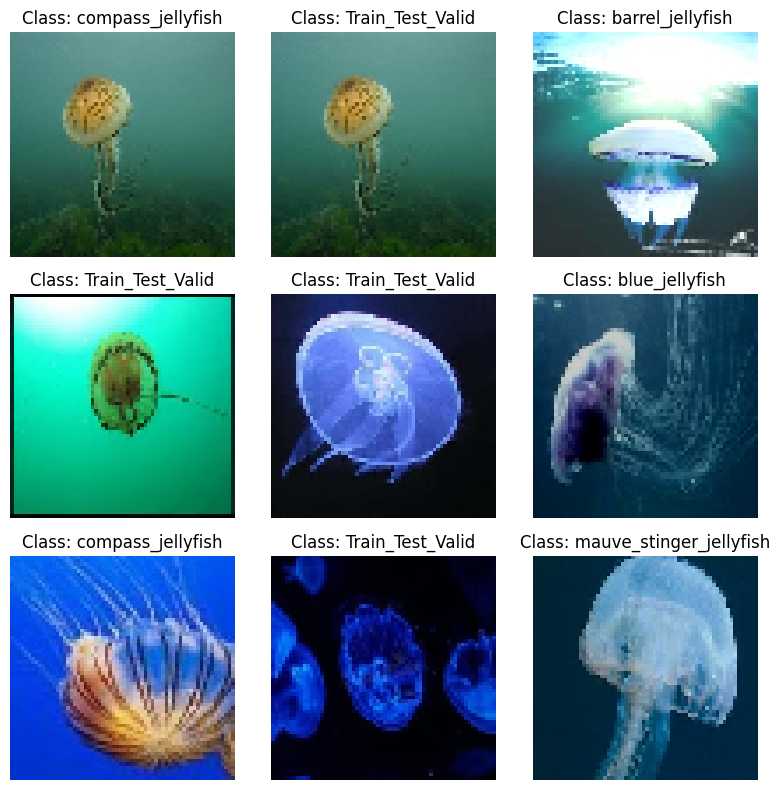

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/drive/MyDrive/archive"

# Image size and batch size
img_size = (64, 64)
batch_size = 32

# Data generator (rescale images)
datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Get class labels
class_labels = list(generator.class_indices.keys())

# Load a batch of images and labels
images, labels = next(generator)

num_images = min(9, len(images))

# Plot images in a grid
plt.figure(figsize=(8, 8))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_labels[np.argmax(labels[i])]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import contextlib

data_dir = "/content/drive/MyDrive/archive"

img_size = (64, 64)
batch_size = 16

datagen = ImageDataGenerator(rescale=1./255)

with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
    data_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

total_images = data_generator.samples
num_classes = data_generator.num_classes
print(f"Total images found: {total_images}, Number of classes: {num_classes}")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

print("\nCNN Model Summary Table:")
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
steps_per_epoch = 16

history = model.fit(
    data_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

print(f"\nTraining completed for {epochs} epochs.")

Total images found: 2056, Number of classes: 8

CNN Model Summary Table:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,136 (641.16 KB)

 Trainable params: 164,136 (641.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.3661 - loss: 1.8891
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4468 - loss: 1.9038
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4702 - loss: 1.7164
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4719 - loss: 1.6620
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4330 - loss: 1.7365
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5304 - loss: 1.5196
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5053 - loss: 1.5153
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4488 - loss: 1.6150
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.2500 - loss: 2.0165
Epoch 10/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


16/16 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4967 - loss: 1.4358

Training completed for 10 epochs.


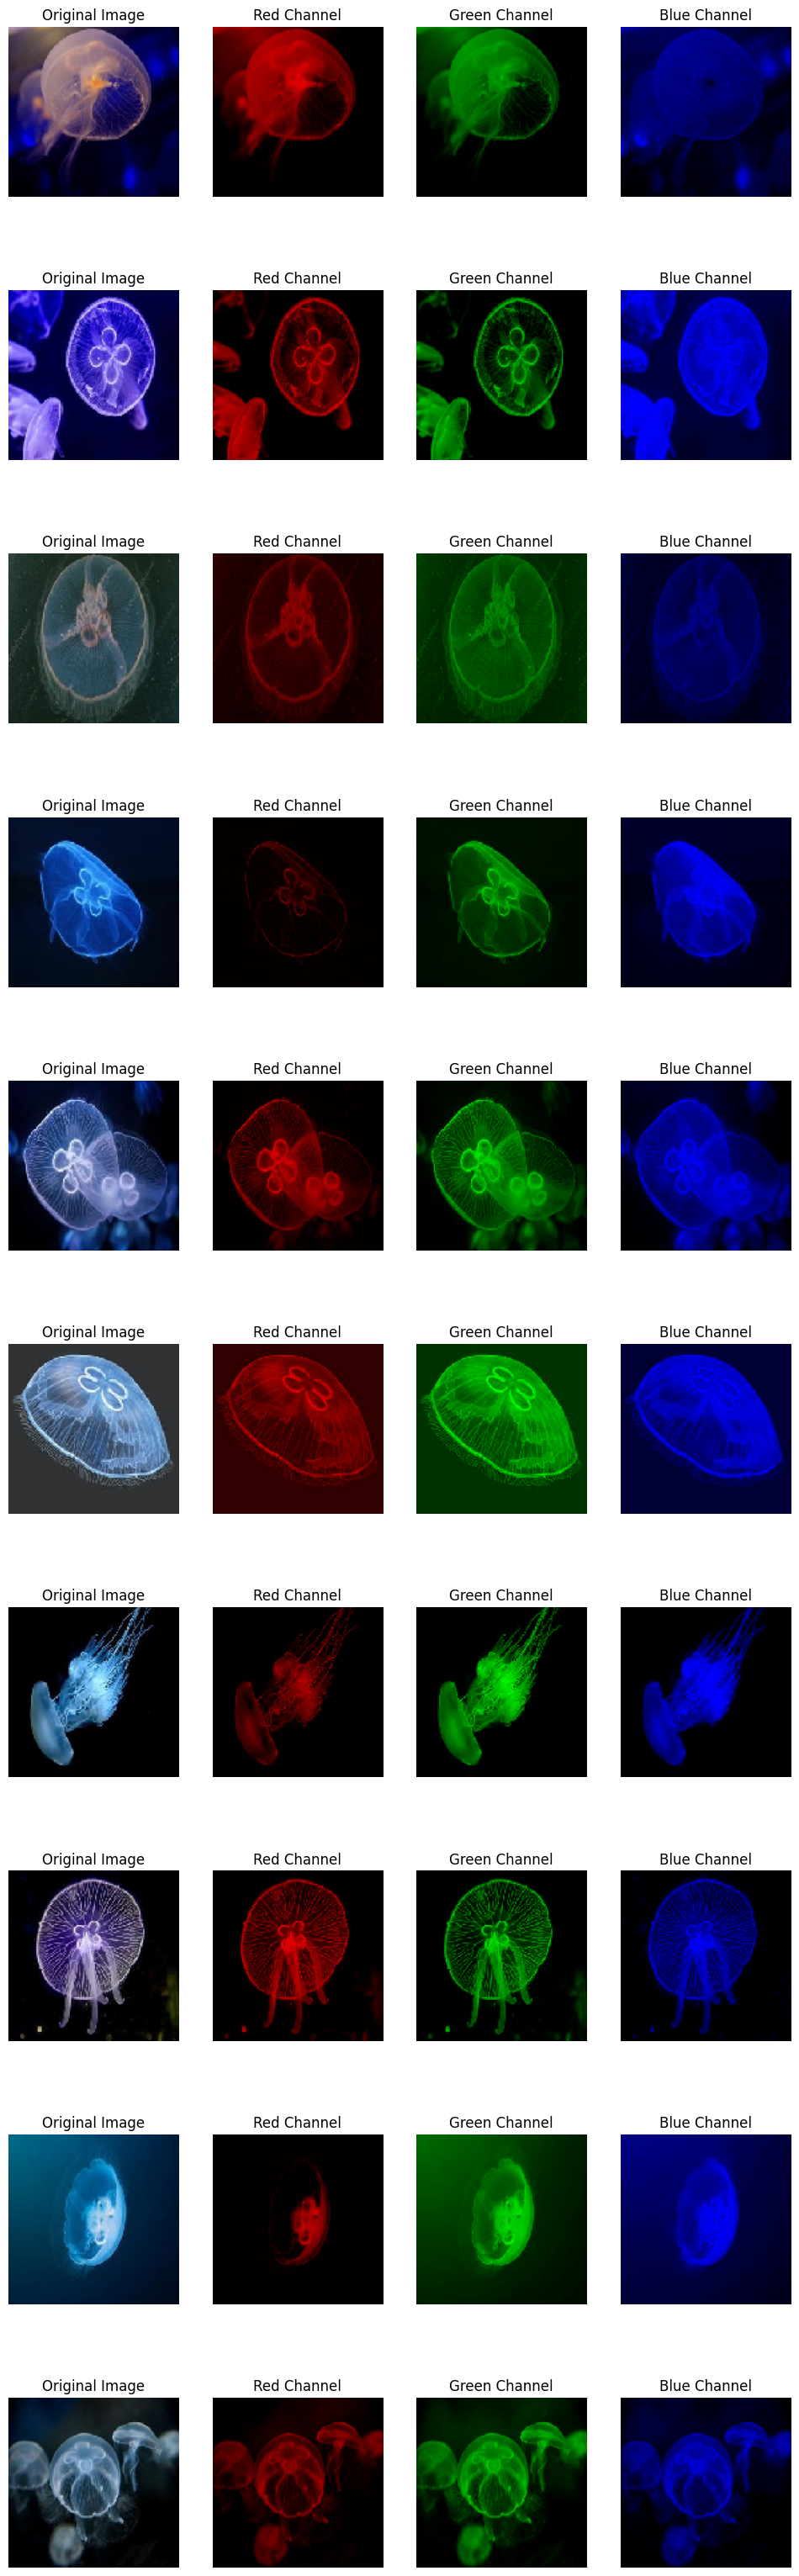

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Function to display original and RGB channel images
def display_rgb_images(directory, num_images=5):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(12, num_images * 4))

    for i in range(min(num_images, len(image_files))):
        img_path = image_files[i]
        img = load_img(img_path, target_size=(128, 128))  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Normalize to [0,1]

        # Extract RGB channels
        red_channel = img_array.copy()
        red_channel[:, :, 1:] = 0  # Remove Green & Blue

        green_channel = img_array.copy()
        green_channel[:, :, [0,2]] = 0  # Remove Red & Blue

        blue_channel = img_array.copy()
        blue_channel[:, :, :2] = 0  # Remove Red & Green

        # Display Original and RGB channels
        plt.subplot(num_images, 4, i * 4 + 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 2)
        plt.imshow(red_channel)
        plt.title("Red Channel")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 3)
        plt.imshow(green_channel)
        plt.title("Green Channel")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 4)
        plt.imshow(blue_channel)
        plt.title("Blue Channel")
        plt.axis("off")

    plt.show()

# Define dataset_path before calling the function
dataset_path = "/content/drive/MyDrive/archive/Moon_jellyfish"  # Or your actual path
display_rgb_images(dataset_path, num_images=10)

Model for RGB images:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │         125,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,842 (565.79 KB)

 Trainable params: 144,842 (565.79 KB)

 Non-trainable params: 0 (0.00 B)

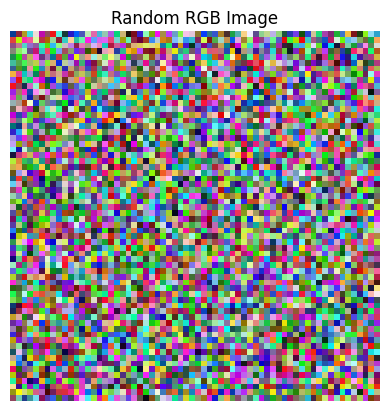

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.0935 - loss: 2.4226
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.1122 - loss: 2.3027
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.1250 - loss: 2.2994
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.1888 - loss: 2.2982
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.1328 - loss: 2.2969
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.1547 - loss: 2.2922
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.1256 - loss: 2.2954
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.1494 - loss: 2.2867
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.1324 - loss: 2.2759
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.1756 - loss: 2.2680
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.1566 - loss: 2.2553
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/ste

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Model for RGB images:")

def create_cnn_model(input_shape=(64, 64, 3)):
  """
  Creates a CNN model with the specified input shape.
  """
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  return model

model_rgb = create_cnn_model(input_shape=(64, 64, 3))
model_rgb.summary()

def display_random_rgb_image():
    random_image = np.random.rand(64, 64, 3)
    plt.imshow(random_image)
    plt.axis("off")
    plt.title("Random RGB Image")
    plt.show()

display_random_rgb_image()

x_train = np.random.rand(1000, 64, 64, 3)
y_train = tf.keras.utils.to_categorical(np.random.randint(10, size=(1000,)), num_classes=10)

model_rgb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_rgb.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

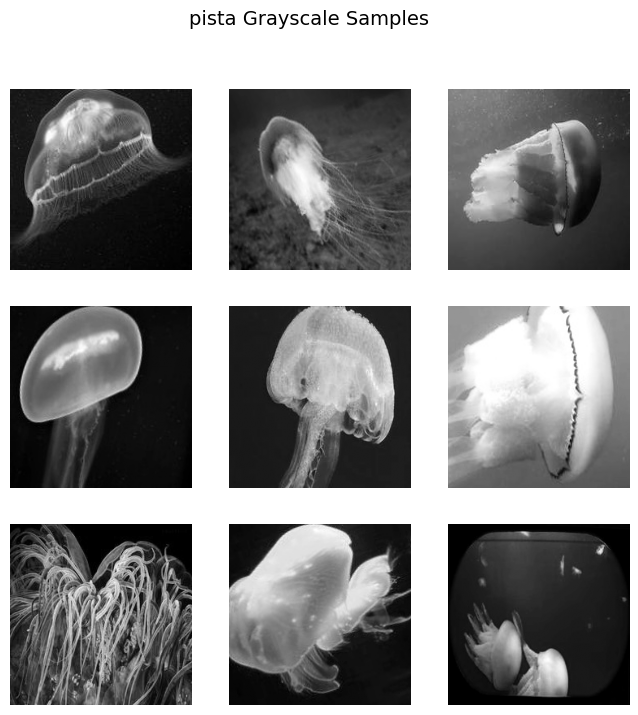

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Function to Display Grayscale Images
def display_grayscale_images(directory, num_images=9, title="Grayscale Dataset Samples"):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to Grayscale
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap="gray")  # Display in grayscale
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# 🎯 Define the train_path variable with the actual path to your training data:
train_path = "/content/drive/MyDrive/archive/Train_Test_Valid"  # Update with your actual path

# 🔹 Display Grayscale Images
display_grayscale_images(train_path, num_images=9, title="pista Grayscale Samples")


Model for Grayscale images:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │         125,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,266 (563.54 KB)

 Trainable params: 144,266 (563.54 KB)

 Non-trainable params: 0 (0.00 B)

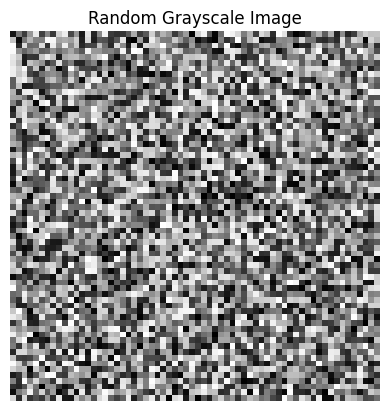

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.0640 - loss: 2.4160
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.1283 - loss: 2.3007
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 0.1150 - loss: 2.2981
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.1419 - loss: 2.2991
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.1190 - loss: 2.3023
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.1110 - loss: 2.3034
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.1193 - loss: 2.3011
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.1224 - loss: 2.3002
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.1309 - loss: 2.2986
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.1127 - loss: 2.2999
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.1278 - loss: 2.2994
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/ste

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Model for Grayscale images:")

def create_grayscale_model(input_shape=(64, 64, 1)):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model_gray = create_grayscale_model(input_shape=(64, 64, 1))
model_gray.summary()

def display_random_grayscale_image():
    random_image = np.random.rand(64, 64)
    plt.imshow(random_image, cmap='gray')
    plt.axis("off")
    plt.title("Random Grayscale Image")
    plt.show()

display_random_grayscale_image()

x_train = np.random.rand(1000, 64, 64, 1)
y_train = tf.keras.utils.to_categorical(np.random.randint(10, size=(1000,)), num_classes=10)
model_gray.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_gray.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

Found 2056 images belonging to 8 classes.


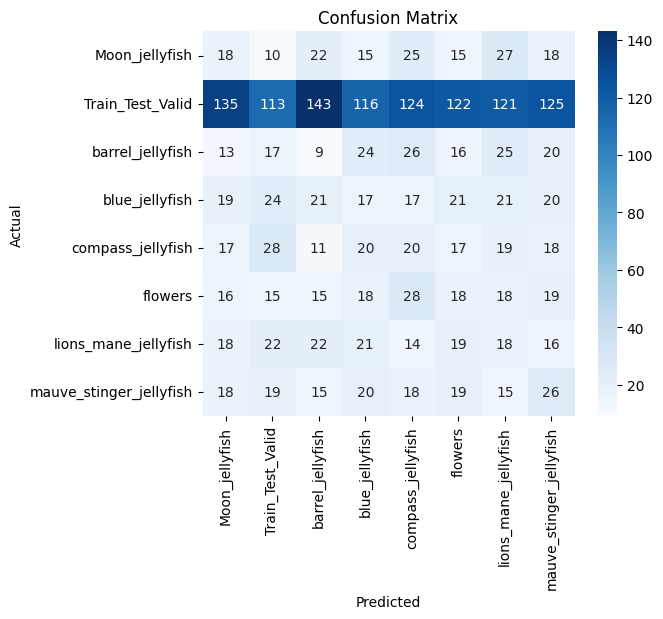

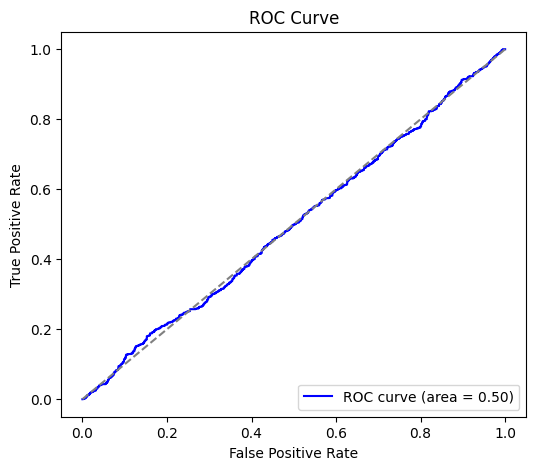

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_path = "/content/drive/MyDrive/archive"
img_size = (64, 64)
batch_size = 32

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_labels = list(val_generator.class_indices.keys())

y_true = val_generator.classes
y_pred_probs = np.random.rand(len(y_true), len(class_labels))
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1], pos_label=1)  # Change index if more classes
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

val_path = "/content/drive/MyDrive/archive"
img_size = (64, 64)
batch_size = 32

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_labels = list(val_generator.class_indices.keys())


y_pred_classes = np.random.randint(0, len(class_labels), size=len(val_generator.classes))
y_true = val_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

<ipython-input-31-c5f2f09bd00e>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2056 images belonging to 8 classes.
Classification Report:
                         precision    recall  f1-score   support

         Moon_jellyfish       0.07      0.11      0.08       150
       Train_Test_Valid       0.47      0.12      0.19       999
       barrel_jellyfish       0.07      0.11      0.09       150
         blue_jellyfish       0.06      0.09      0.07       160
      compass_jellyfish       0.06      0.11      0.08       150
                flowers       0.08      0.14      0.10       147
   lions_mane_jellyfish       0.06      0.11      0.08       150
mauve_stinger_jellyfish       0.06      0.12      0.08       150

               accuracy                           0.12      2056
              macro avg       0.12      0.11      0.10      2056
           weighted avg       0.26      0.12      0.13      2056



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import norm
val_path = "/content/drive/MyDrive/archive"
img_size = (64, 64)
batch_size = 32
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
y_true = val_generator.classes
model1 = model
y_pred1 = model1.predict(val_generator)

y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)
y_pred2 = y_pred1
y_pred_classes2 = y_pred_classes1
accuracy2 = accuracy1
n1 = len(y_pred_classes1)
n2 = len(y_pred_classes2)
p1 = accuracy1
p2 = accuracy2
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)

z_score = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between models.")

Found 2056 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step
Model 1 Accuracy: 0.0083
Model 2 Accuracy: 0.0083
Z-score: 0.0000
P-value: 1.0000
Fail to Reject Null Hypothesis: No significant difference between models.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import ttest_ind
val_path = "/content/drive/MyDrive/archive"
img_size = (64, 64)
batch_size = 32
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
y_true = val_gen
y_pred1 = model1.predict(val_generator)
y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)

y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)
y_pred2 = y_pred1.copy()
noise = np.random.rand(*y_pred2.shape) * 0.1
y_pred2 += noise
y_pred2 /= np.sum(y_pred2, axis=1, keepdims=True)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
accuracy2 = np.mean(y_pred_classes2 == y_true)
t_statistic, p_value = ttest_ind(
    (y_pred_classes1 == y_true).astype(int),
    (y_pred_classes2 == y_true).astype(int),
    equal_var=False
)
print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between models.")

Found 2056 images belonging to 8 classes.
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step
Model 1 Accuracy: 0.0083
Model 2 Accuracy: 0.0000
T-statistic: 4.1393
P-value: 0.0000
Reject Null Hypothesis: The models have significantly different accuracies.
